# Preliminary code

## Import

In [2]:
import warnings
warnings.filterwarnings('ignore')

import ROOT
ROOT.gROOT.ProcessLine( "gErrorIgnoreLevel = 2001;")
%jsroot off

import hepplotting as plt

Welcome to JupyROOT 6.10/02


## Define histogram meta-data

In [4]:
bkg_name = ['bkg1','bkg2','bkg3']

bkg_legname = {
    'bkg1': '#chi#bar{#chi} #rightarrow MM',
    'bkg2': 'pp #rightarrow #psi#bar{#psi}'  ,
    'bkg3': 'H^{+}_{2} with #alpha=1/137'   ,
}

bkg_color = {
    'bkg1' : 868,
    'bkg2' : 867,
    'bkg3' : 866,
}

## Create fake histograms

In [9]:
counter = -1
def get_random_histo(name, N):
    global counter
    h=ROOT.TH1F(name,name,30,-5,10)
    h.FillRandom('gaus', N)
    h.SetName(h.GetName()+'_tmp{}'.format(counter))
    counter+=1
    return h

n_evts = [246, 251, 252]

## Prepare the objects for the plotting function

In [10]:
dictBkg = {b: [get_random_histo(b, n), bkg_color[b], bkg_legname[b]] for b, n in zip(bkg_name, n_evts)}
dictSig = {'s': [get_random_histo('s', 52), ROOT.kRed+1, 20, 'M_{Madaron}=1 MeV']}
hData   = plt.sum_histograms([get_random_histo('Data', 250) for i in range(0,3)])
hTot    = plt.sum_histograms( [v[0] for v in dictBkg.values()] )

# Few examples playing with options

## Default plot with axis labels

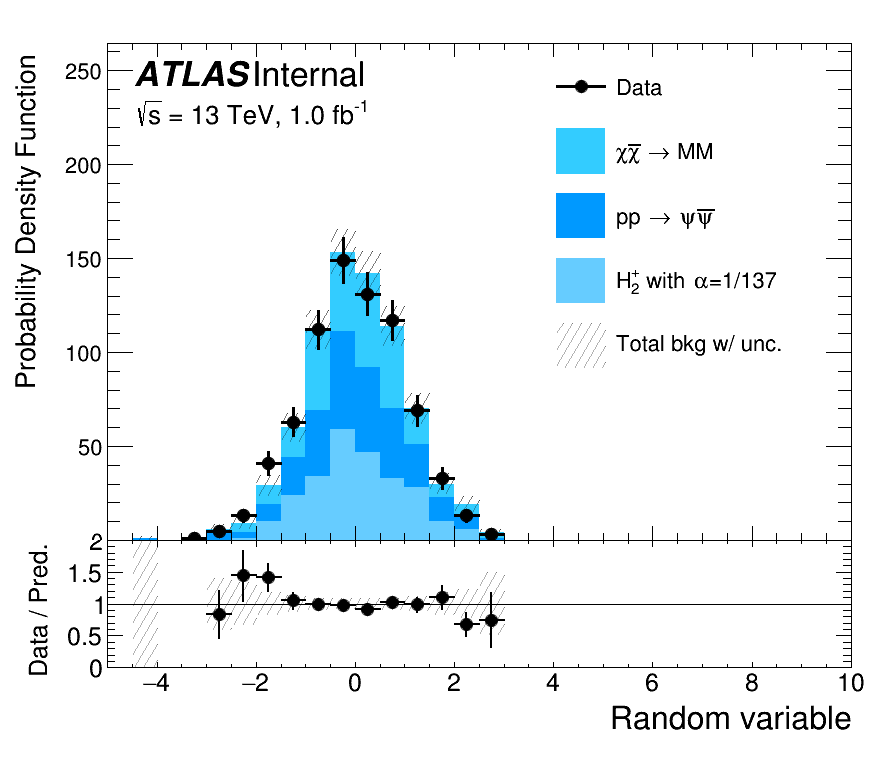

In [11]:
c = plt.make_nice_canvas(dictBkg, hTot, hData, plot_name='Example_plot',
                        ytitle='Probability Density Function',
                        xtitle='Random variable')
c.Draw()

## Adding a ratio plots with significance and yields in legend

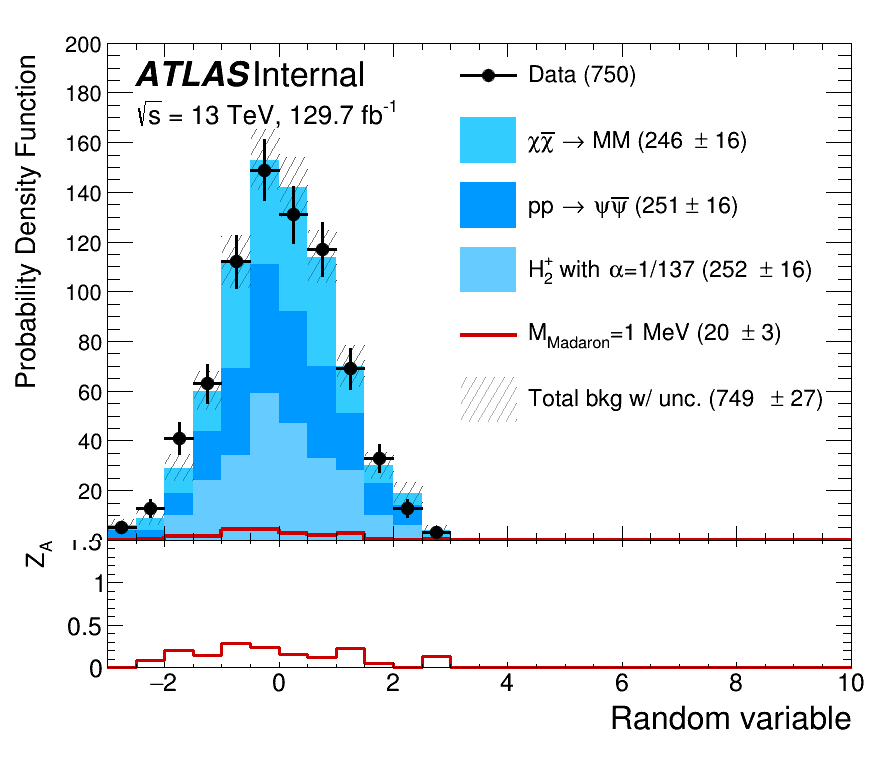

In [12]:
c = plt.make_nice_canvas(dictBkg,hTot,hData,plot_name='Example_plot', dictSig=dictSig,
                     ytitle='Probability Density Function',
                     xtitle='Random variable', plot_ratio=True,
                     ymax=200, ratio_type='signif', lumi=129.7, xmin=-3,
                     leg_ncols=1, leg_with_nevts=True, leg_textsize=0.047, leg_pos=[0.5, 0.2, 0.86, 0.92])
c.Draw()

## Removing bottom pad, 2 columns legends, logscale

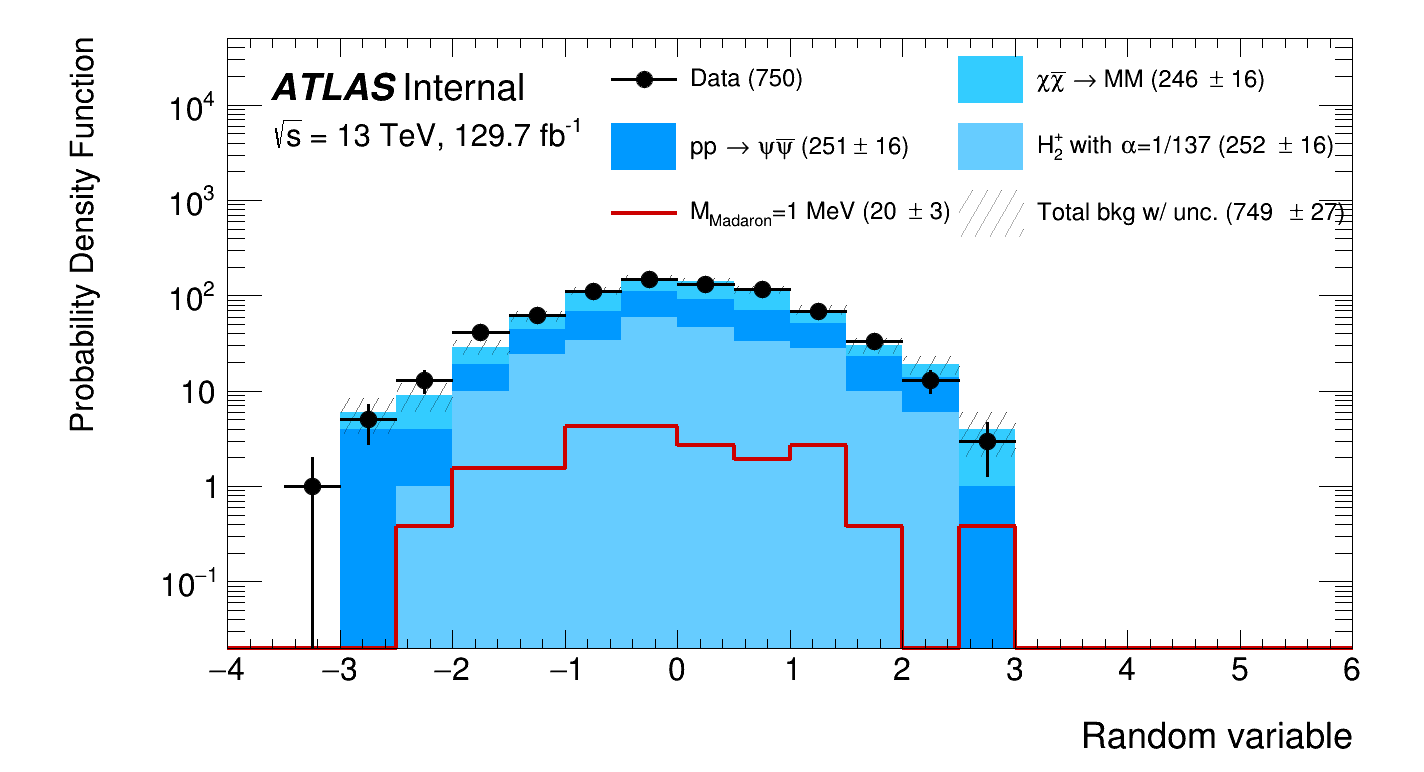

In [13]:
c = plt.make_nice_canvas(dictBkg,hTot,hData,plot_name='Example_plot', dictSig=dictSig,
                     ytitle='Probability Density Function',
                     xtitle='Random variable', plot_ratio=False, is_logy=True, can_ratio=0.7,
                     ymax=5e4, lumi=129.7, xmin=-4, xmax=6,
                     leg_ncols=2, leg_with_nevts=True, leg_textsize=0.034, leg_pos=[0.42, 0.68, 0.94, 0.94])
c.Draw()